In [3]:
%load_ext autoreload
%autoreload 2
import barcoderegression
import pickle
import numpy as np
import matplotlib.pylab as plt
import scipy as sp
import scipy.ndimage
import tqdm.notebook
import numpy.random as npr
import ipywidgets
import skimage
import skimage.feature
import pkg_resources

from barcoderegression.plotting import AnimAcross
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# from simulated data

In [4]:
DATA_PATH = pkg_resources.resource_filename('barcoderegression', 'example.pkl')
with open(DATA_PATH,'rb') as f:
    example=pickle.load(f)
    gene_names=example['gene_names']
    codebook=example['barcode']
    genedistr=example['genedistr']

In [16]:
spatial_dims=(100,100)
sim=barcoderegression.simulations.simulate(codebook,spatial_dims,300)
X=sim['X']

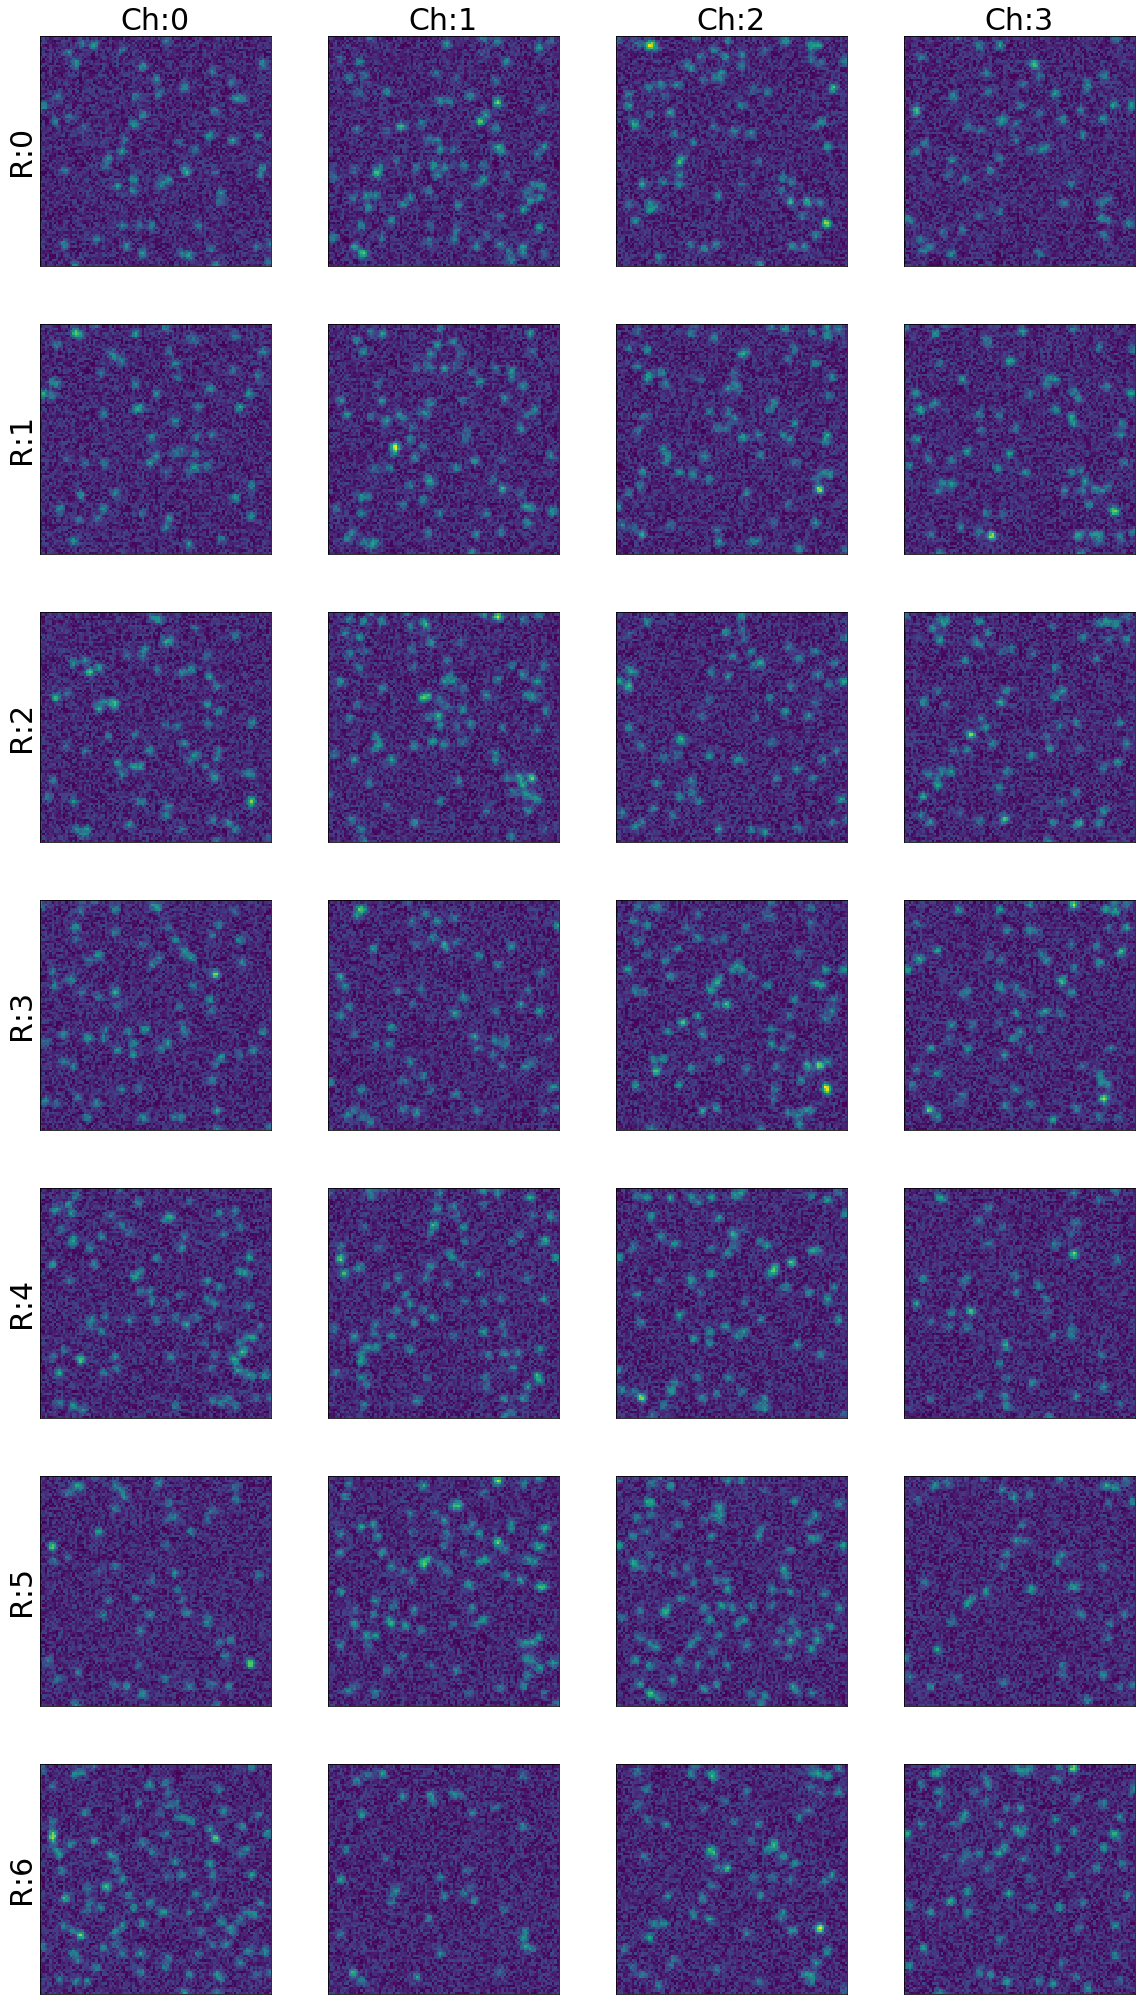

In [17]:
barcoderegression.plotting.plot_raw_data_2d(X)

# model and learn


we never went the wrong way!
      reconstruction 1.10e+02
                  l1 1.46e+04
                 lam 1.00e-02
        l1_times_lam 1.46e+02
          total_loss 2.57e+02
                loss 9.17e-04


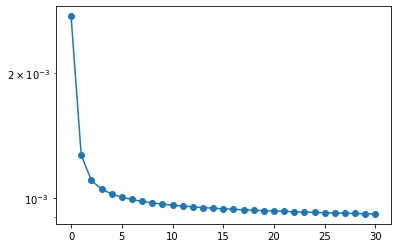

In [22]:
model=barcoderegression.denselearner.Model(
    codebook,
    spatial_dims,
    blur_level=[2,2],
    lam=.01,
)

trainer=barcoderegression.training.Trainer(X,model)
trainer.train_tqdm_notebook(['F','alpha'],30)
trainer.status()


# look at results

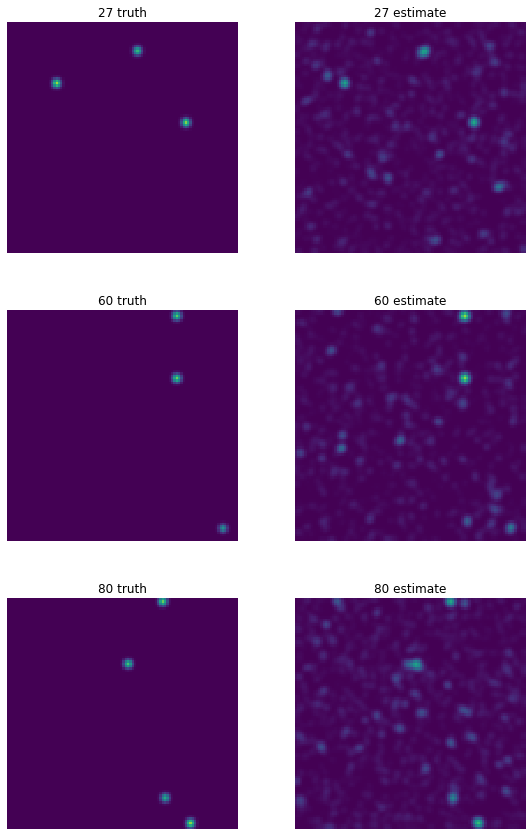

In [33]:
F=sim['model'].F_scaled(blurred=True)
F2=model.F_scaled(blurred=True)

with AnimAcross(columns=2) as a:
    for gidx in [27,60,80]:
        a(f'{gidx} truth')
        plt.imshow(F[:,:,gidx],vmax=F.max()); plt.axis('off')
        
        
        a(f'{gidx} estimate')
        plt.imshow(F2[:,:,gidx],vmax=F2.max()); plt.axis('off')